# Monte Carlo Simulations - Lab

## Introduction

In order to calculate the precise probability of an event occurring, one needs to know the number of occurrences and the number of possible outcomes. If there are a large number of variables, these sample spaces can explode very quickly. Often, these spaces are so large that analyzing all possible outcomes is not  possible. As an alternative, these large sets can be approximated using Monte Carlo simulations. In this lab, you will conduct a Monte Carlo simulation of a permutation test that would otherwise be infeasible to compute.


## Objectives 

In this lab you will:
- Conduct a Monte Carlo simulation

## Exploding sample sizes

As we discussed in the previous lesson, permutation test sizes can quickly explode as our original sample sizes grow. To demonstrate this, create a graph to show how the number of permutations increases as we increase just one of the sample sizes. Assume that our first sample is of 25 individuals. From there, plot a graph of how the permutation test sample size increases drastically as our second sample increases from 10 to 200 individuals. (Assume that every new person has a unique blood pressure; a stretch of an assumption, but greatly simplifies our calculations for now.)

In [35]:
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Number of ways to create a subset of 25 out of 25+x objects')

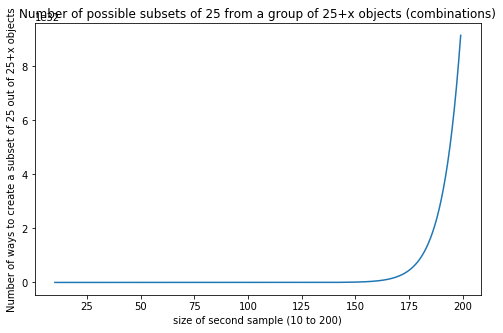

In [36]:
# note: comb(N,k) = N!/(k!.(N-k)!) = number of combinations of N things taken k at a time (order doesn't matter)
x=[]
y=[]
a=25
for b in range(10,200):
    x.append(b)
    y.append(comb((a+b),a))
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.title('Number of possible subsets of 25 from a group of 25+x objects (combinations)')
plt.xlabel('size of second sample (10 to 200)')
plt.ylabel('Number of ways to create a subset of 25 out of 25+x objects')

## Creating the Monte Carlo simulation

Let's expand upon our blood pressure example from the Resampling methods lab. Even with our previous sample sizes of a sample of 14 and a sample of 12, we had a total of over 9 million possible outcomes. As you can see from the graph above, this quantity continues to rapidly increase. As a result, it is often impractical or impossible to calculate all possible variations. Instead, use a Monte Carlo simulation to sample from the sample space in order to emulate a permutation test. While a precise simulation of a permutation test would record which ordered combinations we have already simulate, doing so greatly reduces the speed of the process. Below are the complete samples of two populations' blood pressure.  
  
Write a Monte Carlo simulation to sample from the permutation space. Be sure to not allow replacement so that no cases are repeated. Calculate the p-value after `10, 100, 500, 1000, 10**4, 10**5, 10**6, 2*10**6 and 5*10**6` iterations. Graph these to show how the p-value stabilizes and converges after a large number of iterations.

##  Read this cell before the one above

## Note:
Resampling method lab is in section 14.
What we did back then:
## Permutation testing 
2 samples A and B made of the blood pressure of sample patients.  
The research study is looking to validate whether there is a statistical difference in the blood pressure of these two groups using a 5% significance level.   
First, calculate the difference of the mean blood pressure of each of the two samples.  
From there, generate all the possible combinations of the entire sample data into A-B splits of equivalent sizes as the original sets. For each of these combinations, calculate the differences in mean blood pressure of the two groups . 
The full collection of the difference in means between these generated samples will serve as the denominator to calculate the p-value associated with the difference between the original sample means.  
Example:  
8 blood pressure measures in A 
6 in B
H0 = the drug has no effect on the bloood pressure. difference of means between 2 groups = 0
Ha = if you take the drug, your blood pressure is lowered significantly. control mean - experimental mean  > 0 
A and B are 2 samples We used permutation resampling testing to get 3003 new pairs of subsamples of equivalent sizes as the original sets A and B. Significance treshold: alpha =2.5% because we are doing a one-tail test. ie. statistical significance is obtained when the difference of the means is in the right tail of the distribution above the 2 standard deviation mark.

p-value = fraction of the 3003 differences that are > difference of means of A and B.


In [192]:
a = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
       122.93336175, 110.9271756 , 114.77443758, 116.34159338,
       130.72888419, 116.04552895, 114.8313492 , 117.52704641,
       109.06597142, 117.0317262 , 114.34876391, 111.32151926,
       108.90594481, 110.95040527,  99.15890727, 117.93581615,
       106.35644209, 112.88102458, 103.87574946, 111.88394265,
       115.42450119, 124.02872282, 116.19121625, 115.59471365,
       112.66413025, 118.30562665, 132.31196515, 117.99000948]
b = [123.98967482, 141.11969004, 117.00293412, 121.6419775 ,
       123.2703033 , 123.76944385, 105.95249634, 114.87114479,
       110.50162354, 121.31836918, 124.9483451 , 126.04639783,
       119.71433463, 117.49416398, 129.47657837, 115.57798929,
       117.36035264, 130.92919224, 104.43218778, 119.97610071,
       115.67085089, 113.77487389, 114.02470379, 116.64660978,
       117.3023355 , 116.30944159, 123.66560428, 117.87222118,
       128.8445079 , 111.7976685 , 117.25730744, 111.62121119,
       110.12277446, 112.7150916 , 129.21006268, 125.97287311,
       130.6878082 , 140.60768727, 121.95433026, 123.11996767,
       129.93260914, 121.01049611, 129.23680238]

In [185]:
a = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
       122.93336175, 110.9271756 , 114.77443758, 116.34159338,
       130.72888419, 116.04552895, 114.8313492 , 117.52704641,
       109.06597142, 117.0317262 , 114.34876391, 111.32151926,
       108.90594481, 110.95040527,  99.15890727, 117.93581615,
       106.35644209, 112.88102458, 103.87574946, 111.88394265,
       115.42450119, 124.02872282, 116.19121625, 115.59471365,
       112.66413025, 118.30562665, 132.31196515, 117.99000948]
b = [127.98967482, 145.11969004, 121.00293412, 125.6419775 ,
       131.2703033 , 133.76944385, 135.95249634, 114.87114479,
       140.50162354, 121.31836918, 124.9483451 , 126.04639783,
       119.71433463, 147.49416398, 129.47657837, 119.57798929,
       117.36035264, 130.92919224, 104.43218778, 119.97610071,
       115.67085089, 119.77487389, 119.02470379, 119.64660978,
       119.3023355 , 136.30944159, 123.66560428, 119.87222118,
       128.8445079 , 147.7976685 , 117.25730744, 111.62121119,
       122.12277446, 112.7150916 , 129.21006268, 125.97287311,
       130.6878082 , 140.60768727, 121.95433026, 123.11996767,
       129.93260914, 121.01049611, 129.23680238]

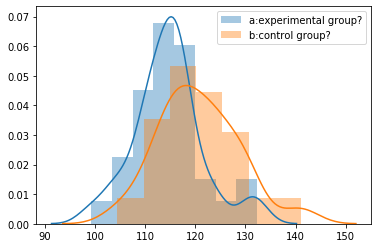

In [193]:
import seaborn as sns
sns.distplot(a,label="a:experimental group?")
sns.distplot(b,label="b:control group?")
plt.legend()

In [163]:
a=[1,2,3]
b=[3,4]



In [157]:
b = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
       122.93336175, 110.9271756 , 114.77443758, 116.34159338,
       130.72888419, 116.04552895, 114.8313492 , 117.52704641,
       109.06597142, 117.0317262 , 114.34876391, 111.32151926,
       108.90594481, 110.95040527,  99.15890727, 117.93581615,
       106.35644209, 112.88102458, 103.87574946, 111.88394265,
       115.42450119, 124.02872282, 116.19121625, 115.59471365,
       112.66413025, 118.30562665, 132.31196515, 117.99000948]
a=[140.6927759 , 145.27296943]

In [194]:
#Your code here
# ⏰ This cell may take several minutes to run
print (len(a), len(b))
print (  comb((len(a)+len(b)),len(a))  )
print (  comb((len(a)+len(b)),len(b))  )
# If we were using the permutation resampling process, we would generate 1.5*10^21 sets of 2 samples !!
# Let's generate only a subset to speed things up
union=a+b
firstdiff = np.mean(b)- np.mean(a)
print(firstdiff)



32 43
1.5606061216122654e+21
1.5606061216122654e+21
6.043384265966566


In [197]:
n= 80000
countr=0
s=len(a)

countrlist=[]

meanu=np.mean(union)
lenu=len(union)

# loop
for i in range(n):
    
    # choose randomly len(a) samples from union
    smpla = np.random.choice(union, size=s, replace=False)
    
    #meanofsampleb*lenofsampleb+meanofsamplea*lenofsamplea = meanofunion*lenofunion
    meanb = (meanu*lenu-(np.mean(smpla))*s) / (lenu-s)
        
    diff = meanb - (np.mean(smpla))
    
    if diff >= firstdiff:
#         print('yes')
        countr+=1
    i+=1
    countrlist.append(countr)
#     print(smpla)
# print(countrlist)

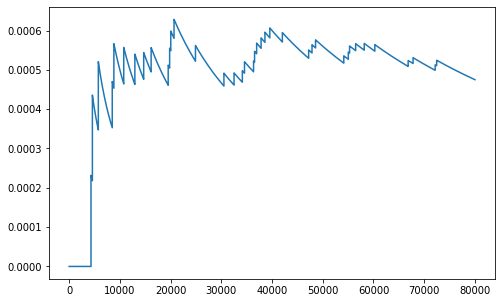

0.0 0.0
0.0 0.000504999495000505


In [200]:
pvallist=[]
for i in range(len(countrlist)):
    pvallist.append(countrlist[i]/(i+1))
# print(pvallist)

plt.figure(figsize=(8,5))
x=range(len(pvallist))
y=pvallist
plt.plot(x,y)
plt.show();

print(pvallist[9],pvallist[99])
print(pvallist[900],pvallist[9900])

In [202]:
# ⏰ This cell may take several minutes to run
diff_mu_a_b = np.mean(a) - np.mean(b)
print(diff_mu_a_b)
num = 0
denom = 0
union = a + b
for i in range(80000):
    # Generate ai
    ai = np.random.choice(union, size=len(a), replace=False)
    # Generate its compliment as bi
    bi = union.copy()
    for item in ai:
        bi.remove(item)
    diff_mu_ai_bi = np.mean(ai) - np.mean(bi)
    if diff_mu_ai_bi < diff_mu_a_b:
        num +=1
    denom += 1
    # Compute difference in means
    if i in [10,90,100,500,1000, 10**4, 10**5, 10**6, 2*10**6, 5*10**6]:
        print("After {} iterations p-value is: {}".format(i, num/denom))

-6.043384265966566
After 10 iterations p-value is: 0.0
After 90 iterations p-value is: 0.0
After 100 iterations p-value is: 0.0
After 500 iterations p-value is: 0.001996007984031936
After 1000 iterations p-value is: 0.000999000999000999
After 10000 iterations p-value is: 0.00019998000199980003


In [191]:
#I don't understand these results but they are consistent with the solution....

## Summary

In this lab you simulated a permutation test and observed both how sample sizes can explode rapidly and how p-values will converge over time in a simulation.